C:\Users\eriks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eriks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eriks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eriks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

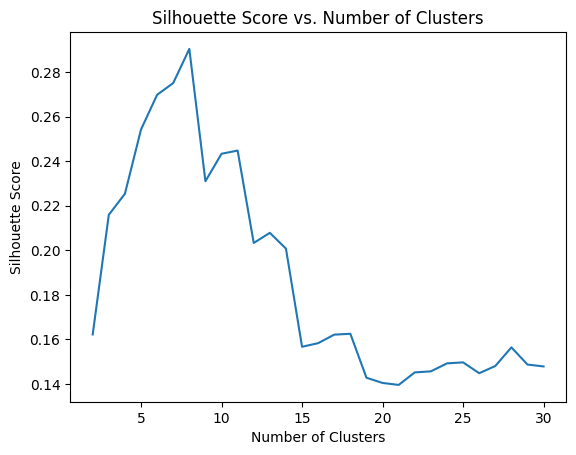

C:\Users\eriks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


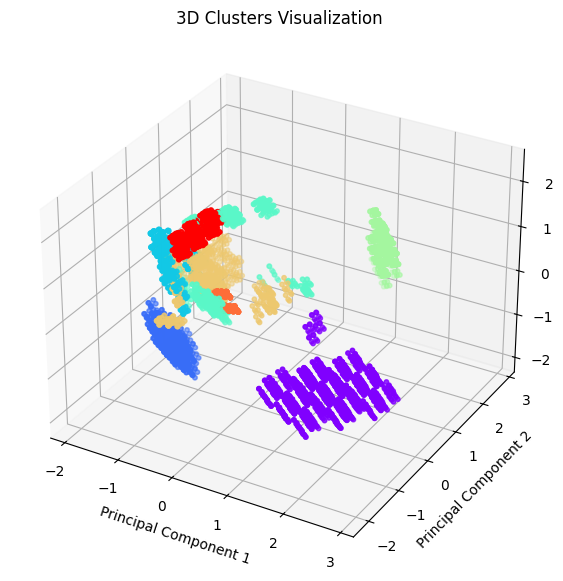

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("agaricus-lepiota.csv")

# Encodes the data in values for each feature, making the machine able to read the categorical dataset
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(df.drop(columns=['edibility']))

# Determine optimal number of clusters using the silhouette score from each iteration
sil_scores = []


for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_encoded)
    # silhouette_score calculates a measure for the quality of the clusters
    silhouette_avg = silhouette_score(data_encoded, kmeans.labels_)
    sil_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 31), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Based on the plot, choose optimal k and visualize using PCA
optimal_k = sil_scores.index(max(sil_scores)) + 2
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42).fit(data_encoded)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_encoded.toarray())

''' 
# Display the clusters in 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_encoded.toarray())

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_optimal.labels_, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.show()
'''

# Display the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=kmeans_optimal.labels_, cmap='rainbow', s=10)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters Visualization')
plt.show()